# Домашня робота №7

# Перетворення випадкових величин

In [33]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

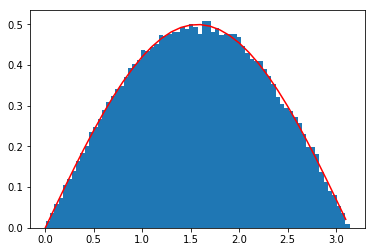

In [3]:
from scipy.stats import uniform

def f(y):
    return np.arcsin(y / a) + np.pi / 2

a = 1/2
u = uniform(-0.5, 1) 
u_rvs = f(u.rvs(100000))

xk = np.arange(0, np.pi, 0.1)

plt.hist(u_rvs, density=True, bins=70)
plt.plot(xk, a * np.sin(xk), 'r-')
plt.show()

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

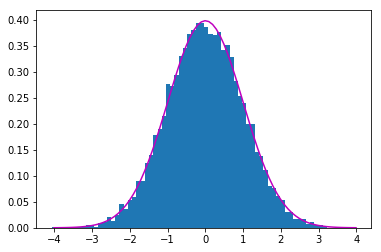

In [4]:
from scipy.stats import norm

x = np.arange(-4.01, 4, 0.1)
n_pdf = norm(0, 1).pdf(x)
u = uniform(0, 1).rvs(size=10000)
y = norm(0, 1).ppf(u)
plt.hist(y, density=True, bins=70)
plt.plot(x, n_pdf, 'm')
plt.show()

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

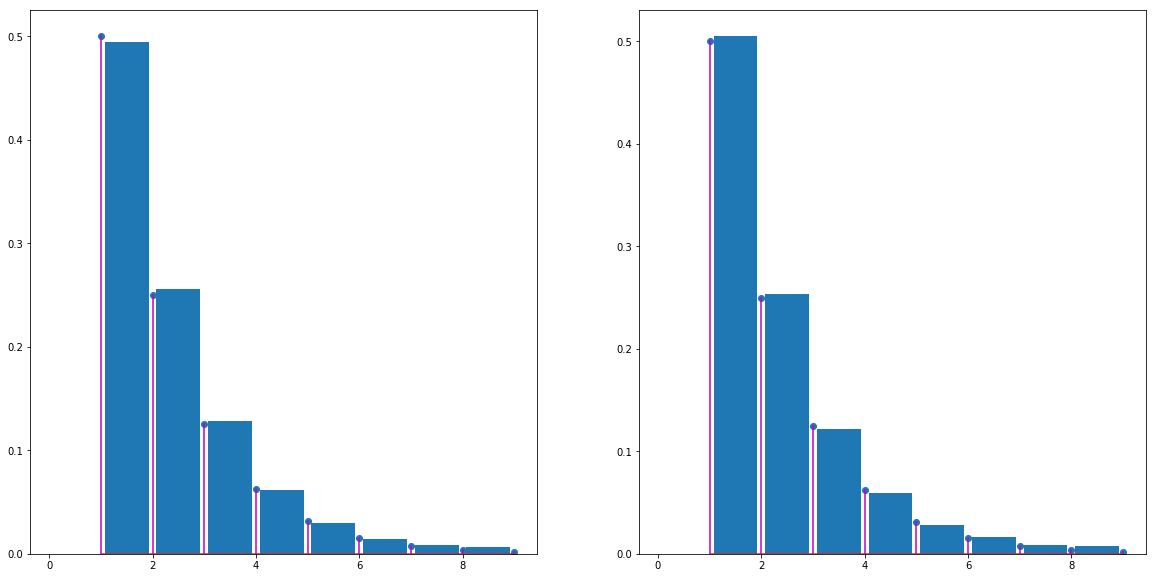

In [5]:
from scipy.stats import geom

xi_rvs = geom(0.5).rvs(size=10000)
rez = xi_rvs*np.array([int(i-1 > 0) for i in xi_rvs]) - 1

fig = plt.figure(figsize=(20,5))
fig.set_size_inches(20, 10)
plt.subplots_adjust(hspace=0.4)

x = np.arange(1, 10)
xi_pmf = geom(0.5).pmf(x)

plt.subplot(1, 2, 1)
plt.hist(xi_rvs, density=True, rwidth=0.85, bins=range(10))
plt.stem(x, xi_pmf, 'm')

plt.subplot(1, 2, 2)
plt.hist(rez, density=True, rwidth=0.85, bins=range(10))
plt.stem(x, xi_pmf, 'm')

plt.show()

## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

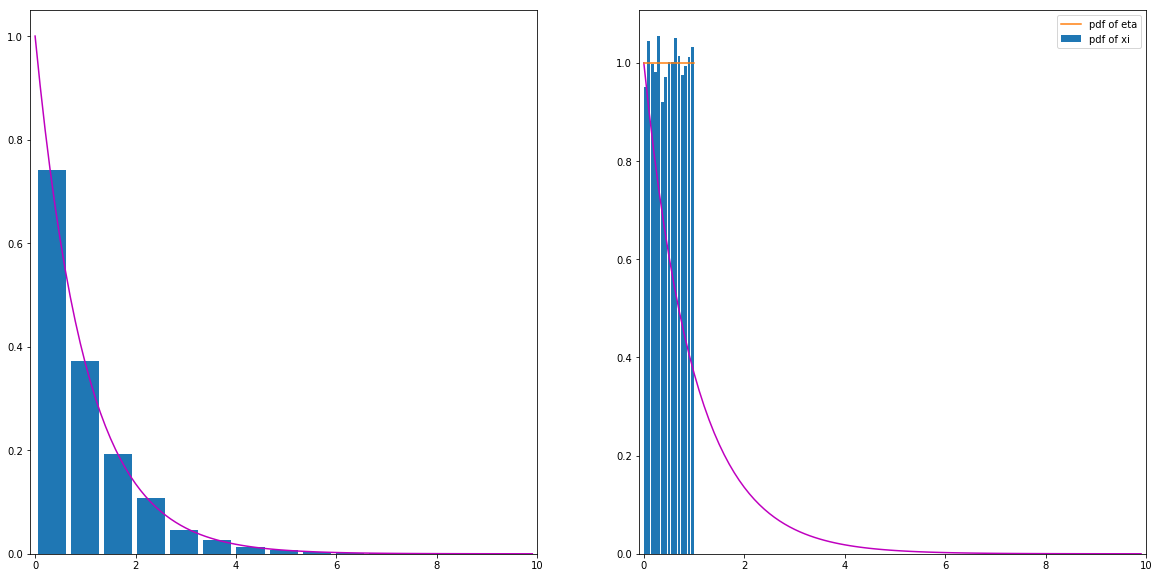

In [7]:
from scipy.stats import expon

xi = expon(0, 1)
xi_rvs = expon(0, 1).rvs(size=10000)
x = np.arange(0, 10, 0.1)
xi_pdf = expon(0, 1).pdf(x)
eta = np.exp(-xi_rvs)

fig = plt.figure(figsize=(20,5))
fig.set_size_inches(20, 10)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1, xlim=(-0.1, 10))
plt.hist(xi_rvs, density=True, rwidth=0.85, bins = 15)
plt.plot(x, xi_pdf, 'm')

plt.subplot(1, 2, 2, xlim=(-0.1, 10))
plt.hist(eta, density=True, rwidth=0.85, bins=15, label='pdf of xi')
plt.plot(x, xi_pdf, 'm')
plt.plot(np.arange(0, 2), (1, 1), label='pdf of eta')
plt.legend()


plt.show()

### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


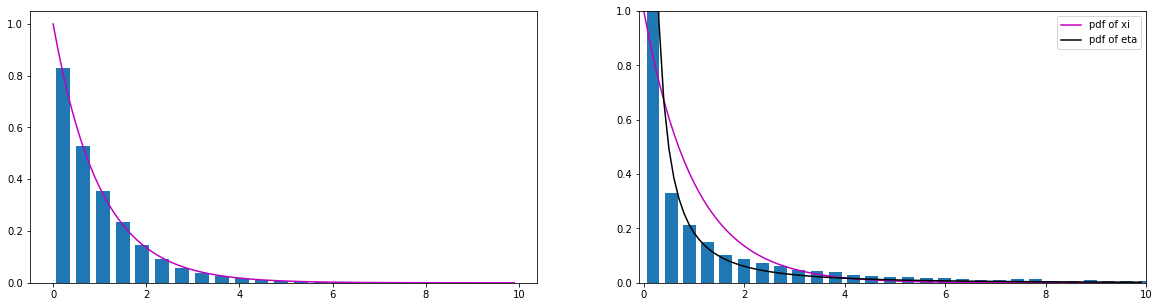

In [8]:
x = np.arange(0, 10, 0.1)
xi_rvs = xi.rvs(size=10000)
eta = xi_rvs**2

fig = plt.figure(figsize=(20,5))
fig.set_size_inches(20, 5)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1)
plt.hist(xi_rvs, density=True, rwidth=0.7, bins=20)
plt.plot(x, xi_pdf, 'm')

plt.subplot(1, 2, 2, xlim=(-0.1, 10), ylim=(0, 1))
plt.hist(eta, density=True, rwidth=0.7, bins=200)
plt.plot(x, xi_pdf, 'm', label="pdf of xi")
plt.plot(x, np.exp(-np.sqrt(x)) / (2 * x), 'k', label='pdf of eta')
plt.legend()

plt.show()

## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

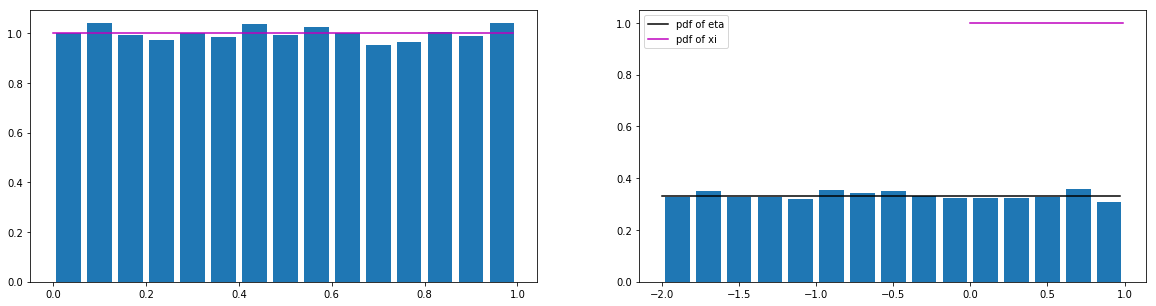

In [9]:
from scipy.stats import uniform

xi = uniform(0, 1)
xi_rvs = xi.rvs(size=10000)
x = np.arange(0, 1, 0.01)
eta = 3*xi.rvs(size=10000) - 2
eta_pdf = xi.pdf((x+2)/3)/3

fig = plt.figure(figsize=(20,5))
fig.set_size_inches(20, 5)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1)
plt.hist(xi_rvs, density=True, rwidth=0.8, bins=15)
plt.plot(x, xi.pdf(x), 'm')

plt.subplot(1, 2, 2)
plt.hist(eta, density=True, rwidth=0.8, bins=15)
plt.plot(3*x-2, eta_pdf, color='k', label='pdf of eta')
plt.plot(x, xi.pdf(x), color='m', label='pdf of xi')

plt.legend()
plt.show()

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

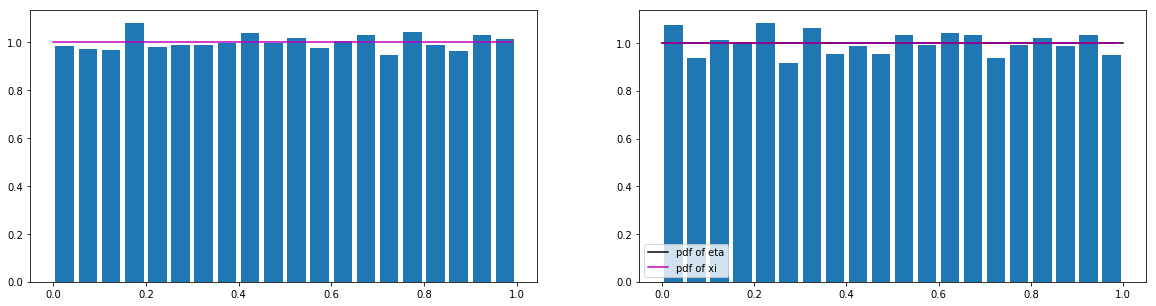

In [10]:
x = np.arange(0, 1, 0.01)
xi = uniform(0, 1)
xi_rvs = xi.rvs(size=10000)
eta = abs(2*xi_rvs - 1)
y = abs(2*x - 1)
eta_pdf = xi.pdf((x+1)/2) + xi.pdf(-(x+1)/2)

fig = plt.figure(figsize=(20,5))
fig.set_size_inches(20, 5)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1)
plt.hist(xi_rvs, density=True, rwidth=0.8, bins=20)
plt.plot(x, xi.pdf(x), 'm')

plt.subplot(1, 2, 2, xlim=(-0.05, 1.05))
plt.hist(eta, density=True, rwidth=0.8, bins=20)
plt.plot(y, eta_pdf, color='k', label="pdf of eta")
plt.plot(x, xi.pdf(x), color='m', label='pdf of xi')

plt.legend()
plt.show()

### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


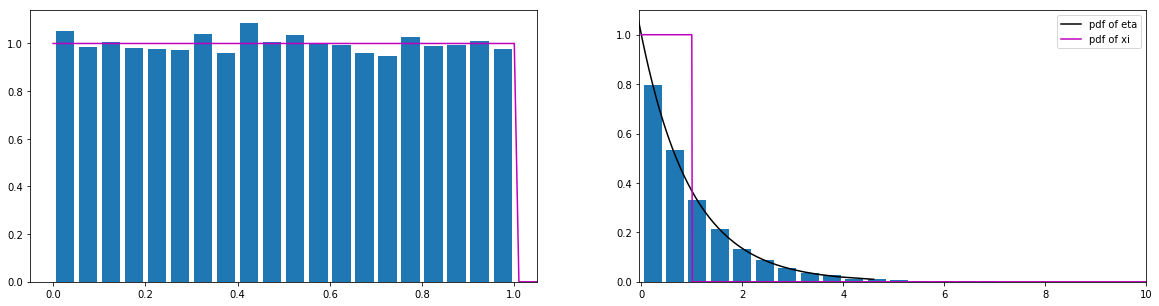

In [11]:
x = np.arange(0, 10, 0.01)
xi = uniform(0, 1)
xi_rvs = xi.rvs(size=10000)
eta = -np.log(xi_rvs)
y = -np.log(x)
eta_pdf = x * xi.pdf(np.exp(-x))

fig = plt.figure(figsize=(20,5))
fig.set_size_inches(20, 5)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1, xlim=(-0.05, 1.05))
plt.hist(xi_rvs, density=True, rwidth=0.8, bins=20)
plt.plot(x, xi.pdf(x), 'm')

plt.subplot(1, 2, 2, xlim=(-0.05, 10), ylim=(0, 1.1))
plt.hist(eta, density=True, rwidth=0.8, bins=20)
plt.plot(y, eta_pdf, color='k', label="pdf of eta")
plt.plot(x, xi.pdf(x), color='m', label="pdf of xi")

plt.legend()
plt.show()

## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [15]:
xi = (uniform(0, 1), uniform(0, 1))


Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

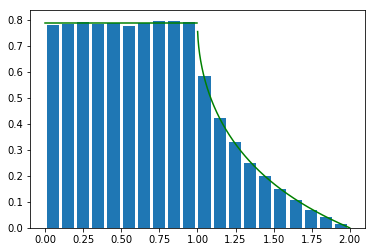

In [26]:
n = 100000
xi = tuple(zip(uniform.rvs(size=n), uniform.rvs(size=n)))
xi_1 = [xi[i][0]**2 + xi[i][1]**2 for i in range(len(xi))]

z1 = np.arange(1.001, 2, 0.001)
f_z1 = np.pi/4 - np.arccos(z1**(-0.5)) -0.5*(z1-1)**(-0.5) + 0.5*(z1-1)**(-0.5)
z2 = np.arange(0, 1.5, 0.5)
f_z2 = [np.pi/4 for i in range(len(z2))]

plt.hist(xi_1, density=True, rwidth=0.8, bins=20)
plt.plot(z1, f_z1, 'g', z2, f_z2, 'g')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

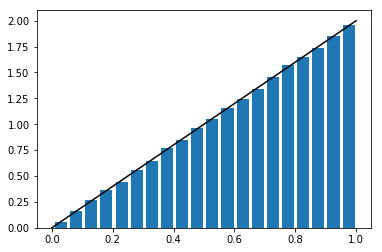

In [30]:
xi_2 = [max(xi[i][0], xi[i][1]) for i in range(len(xi))]
z = np.arange(0, 1.01, 0.01)
f_z = 2*z

plt.hist(xi_2, density=True, rwidth=0.8, bins=20)
plt.plot(z, f_z, 'k')

plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

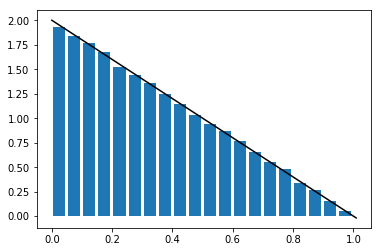

In [32]:
xi_3 = [abs(xi[i][0] - xi[i][1]) for i in range(len(xi))]
z = np.arange(0, 1.01, 0.001)
f_z = -2*z + 2

plt.hist(xi_3, density=True, rwidth=0.8, bins=20)
plt.plot(z, f_z, 'k')

plt.show()